In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


## Problem - Predict the Height based on the Weight.

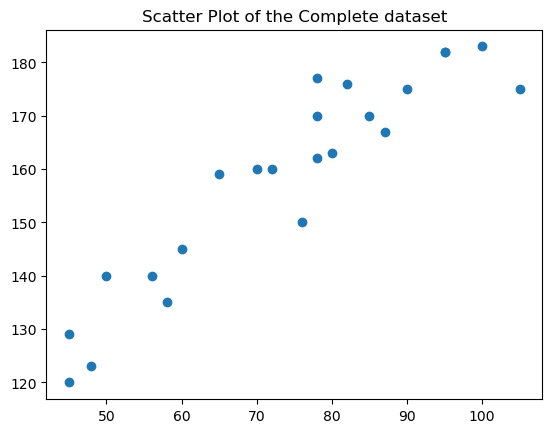

In [3]:
# looking at the whole data to understand the relationship
plt.scatter(df.Weight, df.Height)
plt.title("Scatter Plot of the Complete dataset")
plt.show()

In [4]:
## it's clearly looking like a linear relationship. So we can definitely apply a Linear Regression

# defining variables
X = df[["Weight"]]      #keep the X variable (features in df format, row column format)
y = df.Height

In [5]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 95)

In [7]:
X_train

,Weight
3,60
13,100
15,78
8,95
16,50
7,90
17,65
0,45
1,58
18,76


In [8]:
X_train.shape, X_test.shape

((16, 1), (7, 1))

### Scaling (Though it's optional)
- This helps when our data has large numbers
- **Scaling should only be done in train data.**


In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler 

StandardScaler()

In [10]:
X_train = std_scaler.fit_transform(X_train)       #fit transform the fit (mu sigma calculate) the train data and transforms (X - mu /sigma)
X_test = std_scaler.transform(X_test)        #only transform the test. We don't need another fit obviously. Test data transforms according to the fit of train the data

In [11]:
X_test

array([[ 1.43281758],
       [-0.98360991],
       [ 0.81322079],
       [ 0.62734175],
       [-1.66516638],
       [ 2.05241438],
       [ 0.50342239]])

In [12]:
X_train

array([[-0.73577119],
       [ 1.74261598],
       [ 0.37950304],
       [ 1.43281758],
       [-1.35536798],
       [ 1.12301919],
       [-0.4259728 ],
       [-1.66516638],
       [-0.85969055],
       [ 0.25558368],
       [-0.1161744 ],
       [-1.47928734],
       [ 0.37950304],
       [ 0.93714015],
       [ 0.37950304],
       [ 0.00774496]])

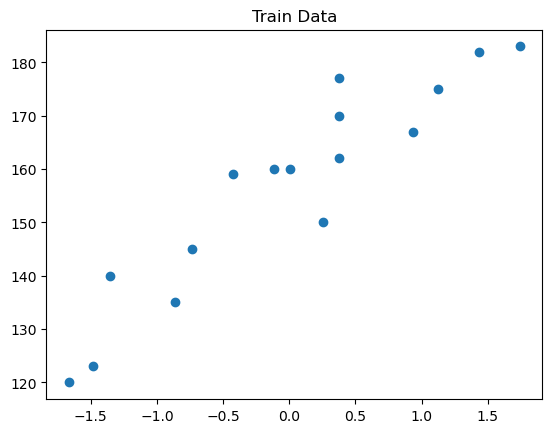

In [13]:
## plotting the train data
plt.scatter(X_train, y_train)
plt.title("Train Data")
plt.show()

## Model Training

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor

LinearRegression()

In [15]:
regressor.fit(X = X_train, y = y_train)

LinearRegression()

In [16]:
coff = regressor.coef_

In [17]:
intercept = regressor.intercept_

In [18]:
print(f"For our fitted Linear Regression Model: \n Intercept = {intercept} \t Coefficient = {coff}")

For our fitted Linear Regression Model: 
 Intercept = 156.75 	 Coefficient = [17.8037266]


### Model: $Height (y) = 156.75 + 17.80 * Weight (X)$

In [19]:
### plot the predicted regression line on train data

y_pred_train = regressor.predict(X_train)
y_pred_train

array([143.65053086, 187.77505848, 163.50656829, 182.25949253,
       132.61939896, 176.74392658, 149.16609681, 127.103833  ,
       141.44430448, 161.30034191, 154.68166277, 130.41317258,
       163.50656829, 173.43458701, 163.50656829, 156.88788915])

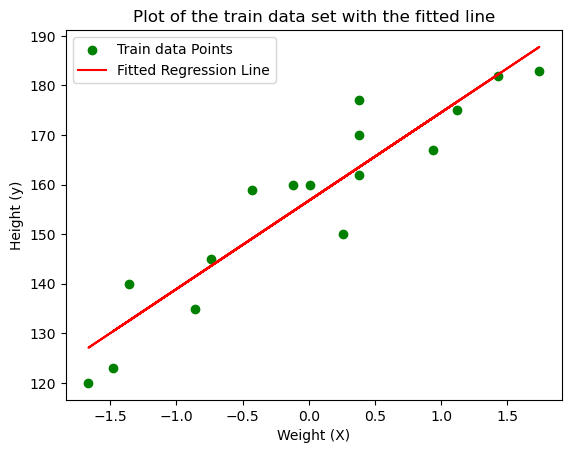

In [20]:
plt.scatter(X_train, y_train, label = "Train data Points", c = "g")
plt.plot(X_train, y_pred_train, c = "r", label = "Fitted Regression Line")
plt.title("Plot of the train data set with the fitted line")
plt.xlabel("Weight (X)")
plt.ylabel("Height (y)")
plt.legend()
plt.show()

In [21]:
## let's try on the test data

y_pred_test = regressor.predict(X = X_test)
y_pred_test

array([182.25949253, 139.2380781 , 171.22836063, 167.91902105,
       127.103833  , 193.29062444, 165.71279467])

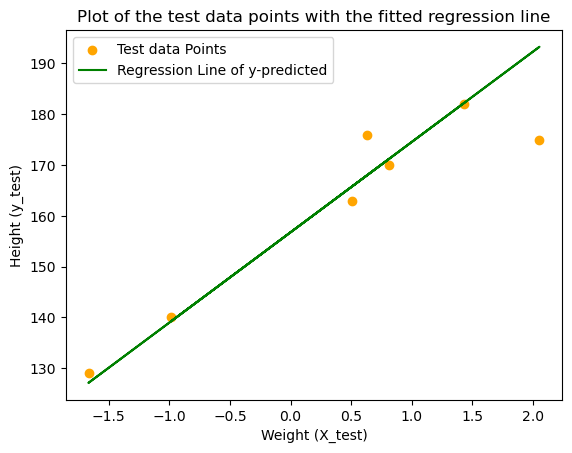

In [22]:
plt.scatter(X_test, y_test, label = "Test data Points", c = "orange")
plt.plot(X_test, y_pred_test, c = "g", label = "Regression Line of y-predicted")
plt.title("Plot of the test data points with the fitted regression line")
plt.xlabel("Weight (X_test)")
plt.ylabel("Height (y_test)")
plt.legend()
plt.show()

### Evaluation metrics

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_test)
r2 = r2_score(y_true = y_test, y_pred = y_pred_test)

n = len(y_test) #total no of data points
p = X_test.shape[1] # no of predictors
adjusted_r2 = 1 - ((1 - r2) * (n -1) / (n - p - 1))

In [24]:
r2, adjusted_r2

(0.8281376819811934, 0.7937652183774321)

In [33]:
print("The evaluation metrics : \n")
print(f" MSE : {mse:.3f} \t MAE : {mae:.3f} \t RMSE : {rmse:.3f} \n\n R^2 : {round((r2 * 100), 2)}% \t Adjusted R^2 : {round(adjusted_r2,4) * 100}%")

The evaluation metrics : 

 MSE : 58.994 	 MAE : 4.747 	 RMSE : 7.681 

 R^2 : 82.81% 	 Adjusted R^2 : 79.38%


### With this metrics values we can say the model is quite good to be used to predict the **Height** based on the **Weight**

#### Verification of the assumptions of SLR:
1. Linear Relationship between x y ☑️
2. Each observation should be independent (one individual's height-weight doesn't depend upon others') ☑️
3. Error should have constant variance
    - We will verify by plotting Residual Vs. Y_pred (Residual plot shouldn't have any pattern)
4. Error is normally distributed
    - We will plot a distribution model

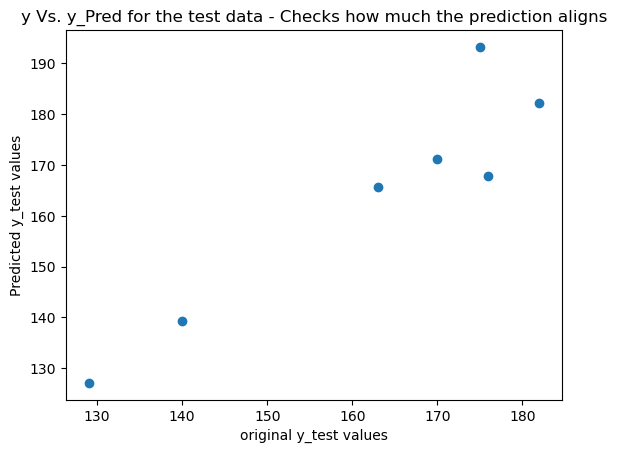

In [26]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("original y_test values")
plt.ylabel("Predicted y_test values")
plt.title("y Vs. y_Pred for the test data - Checks how much the prediction aligns")
plt.show()

In [27]:
error = y_test - y_pred_test
error

11    -0.259493
21     0.761922
14    -1.228361
10     8.080979
20     1.896167
12   -18.290624
6     -2.712795
Name: Height, dtype: float64

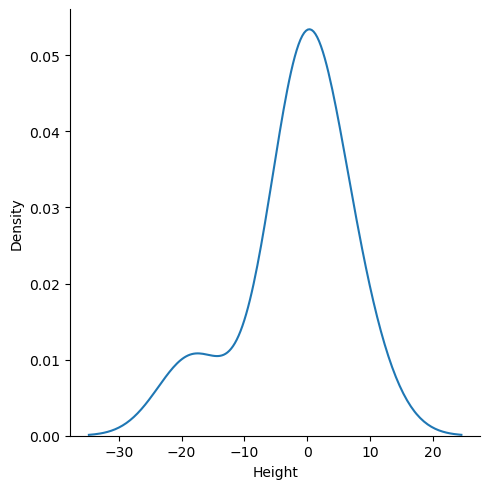

In [28]:
sns.displot(error, kind = "kde")  #should look like approx a normal distribution
plt.show()

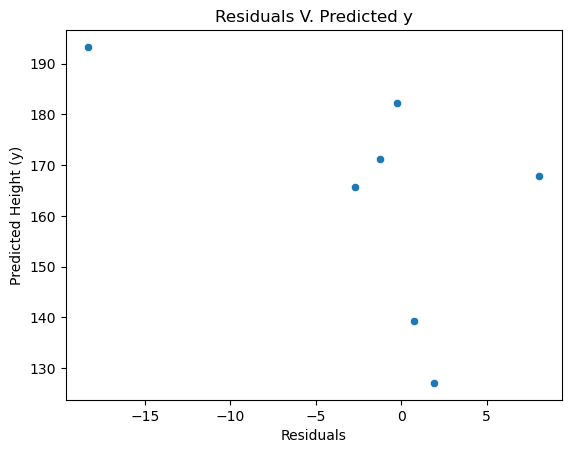

In [29]:
sns.scatterplot(x = error, y = y_pred_test)
plt.title("Residuals V. Predicted y")
plt.xlabel("Residuals")
plt.ylabel("Predicted Height (y)")
plt.show()

> The plot look like that the points are random i.e., there is no pattern. Therefore we can say it's **Homoscedastic**